# Betting Strategy Using the Kelly Criterion

In this notebook we will explore how to determine the optimal bet size to maximize long-term growth when betting on a random outcome. 




# Question 1
You are betting on a random outcome where the outcome is uniformly distributed between 0 and 100. You can either win or lose based on the value of the outcome. If the outcome is above 50 you win 2x your bet and if it’s below 50 you lose your bet. How much should you bet from your $1000 bankroll to maximize your expected long-term growth?

## Problem Statement

You are betting on a random outcome where the outcome is uniformly distributed between 0 and 100. You can either win or lose based on the value of the outcome:
- If the outcome is above 50 you win 2x your bet.
- If the outcome is below 50 you lose your bet.

How much should you bet from your $1000 bankroll to maximize your expected long-term growth?



In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Define the parameters
b = 2  # Net odds received on the bet
p = 0.5  # Probability of winning
q = 1 - p  # Probability of losing


# Number of iterations
n = 10

In [5]:
# Choose a fraction of the bankroll to bet
betting_fraction = 0.1  # Bet 10% of the bankroll

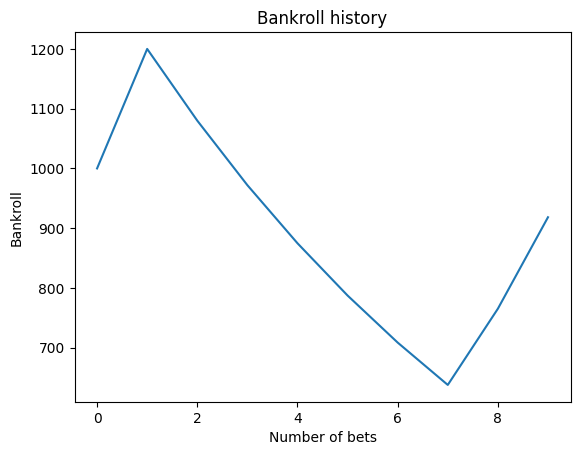

In [ ]:
# simulate betting
bankroll = 1000  # Initial bankroll
bankroll_history = [bankroll]

for i in range(1 n):
    outcome = np.random.rand()
    # Bet a fraction of the bankroll
    bet = betting_fraction * bankroll
    # Win the bet
    bankroll += b * bet if outcome < p else -bet
    # Print the bankroll
    # print('Bankroll after bet {0}: {1}'.format(i bankroll))
    bankroll_history.append(bankroll)

# Plot the bankroll history
plt.plot(bankroll_history)
plt.xlabel('Number of bets')
plt.ylabel('Bankroll')
plt.title('Bankroll history')
plt.show()

## Solution Using the Kelly Criterion

The Kelly Criterion is a formula used to determine the optimal size of a series of bets to maximize the logarithm of wealth. The formula is given by:

\[ f^* = \frac{bp - q}{b} \]

where:
- \( f^* \) is the fraction of the bankroll to bet.
- \( b \) is the net odds received on the bet (i.e. the multiple of the bet you win).
- \( p \) is the probability of winning.
- \( q \) is the probability of losing (i.e. \( 1 - p \)).

In our case:
- \( b = 2 \) (since you win 2x your bet).
- \( p = 0.5 \) (since the outcome is uniformly distributed between 0 and 100 the probability of the outcome being above 50 is 0.5).
- \( q = 1 - p = 0.5 \).

Let's calculate the optimal bet size using the Kelly Criterion.

In [ ]:
# Calculate the optimal fraction to bet
def kelly_criterion(b p):
    q = 1 - p
    f_star = (b * p - q) / b
    return f_star

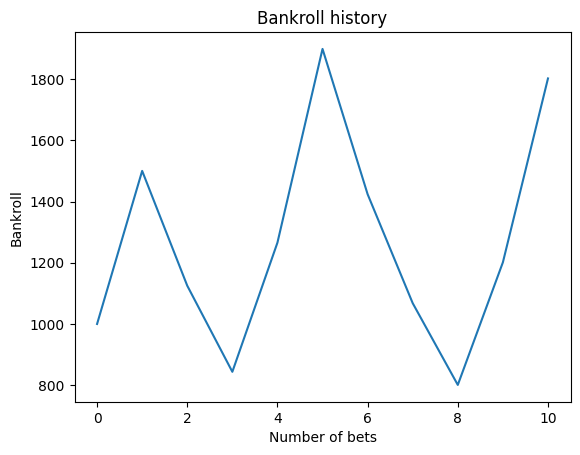

In [ ]:
f_star = kelly_criterion(b p)
bankroll = 1000  # Initial bankroll

# simulate betting
bankroll_history = [bankroll]
for _ in range(n):
    # calculate Kelly fraction
    f_star = kelly_criterion(b p)
    # Bet a fraction of the bankroll
    bet = f_star * bankroll
    # Win the bet
    if np.random.random() < p:
        bankroll += b * bet
    else:
        bankroll -= bet
    bankroll_history.append(bankroll)

# Plot the bankroll history
plt.plot(bankroll_history)
plt.xlabel('Number of bets')
plt.ylabel('Bankroll')
plt.title('Bankroll history')
plt.show()

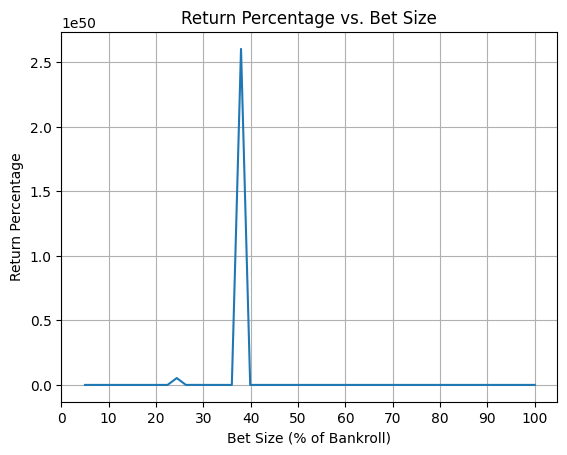

In [231]:
# Define the parameters
p = 0.55  # Probability of winning
b = 2  # Net odds received on the bet
q = 1 - p  # Probability of losing
initial_bankroll = 1000  # Initial bankroll
num_rounds = 1000  # Number of betting rounds

# Function to simulate betting
def simulate_betting(fraction, initial_bankroll, num_rounds, p, b):
    bankroll = initial_bankroll
    for _ in range(num_rounds):
        bet = fraction * bankroll
        outcome = np.random.rand()
        if outcome < p:
            bankroll += b * bet
        else:
            bankroll -= bet
    return bankroll

# Generate data for the plot
fractions = np.linspace(0.05, 1.0, 50)
returns = []

for fraction in fractions:
    final_bankroll = simulate_betting(fraction, initial_bankroll, num_rounds, p, b)
    return_percentage = (final_bankroll - initial_bankroll) / initial_bankroll * 100
    returns.append(return_percentage)

# Plot the data
plt.plot(fractions * 100, returns)
plt.xticks(np.arange(0, 105, step=10))
plt.xlabel('Bet Size (% of Bankroll)')
plt.ylabel('Return Percentage')
plt.title('Return Percentage vs. Bet Size')
plt.grid(True)
plt.show()

In [232]:
max_return = max(returns)
optimal_fraction = fractions[returns.index(max_return)]
print(f"Optimal fraction: {optimal_fraction}")

Optimal fraction: 0.3795918367346939


## Question 2
## Betting on a Fair 6-Sided Die Roll

In this section we will determine the optimal bet size to maximize long-term growth when betting on the outcome of a fair 6-sided die roll. If you bet $100 you win $300 if you roll a 1 2 or 3 (50% chance) and lose $100 if you roll a 4 5 or 6 (50% chance). We will use the Kelly Criterion to find the optimal bet size from a $10000 bankroll.

### Problem Statement

You are betting on the outcome of a fair 6-sided die roll:
- You win $300 if you roll a 1 2 or 3 (50% chance).
- You lose $100 if you roll a 4 5 or 6 (50% chance).

How much should you bet from your $10000 bankroll to maximize your expected long-term growth?


In our case:
- \( b = \frac{300}{100} = 3 \) (since you win $300 for a $100 bet).
- \( p = 0.5 \) (since the probability of rolling a 1 2 or 3 is 0.5).
- \( q = 1 - p = 0.5 \).

Let's calculate the optimal bet size using the Kelly Criterion.


In [43]:
# Define the parameters
b = 3  # Net odds received on the bet
p = 0.5  # Probability of winning
q = 1 - p  # Probability of losing

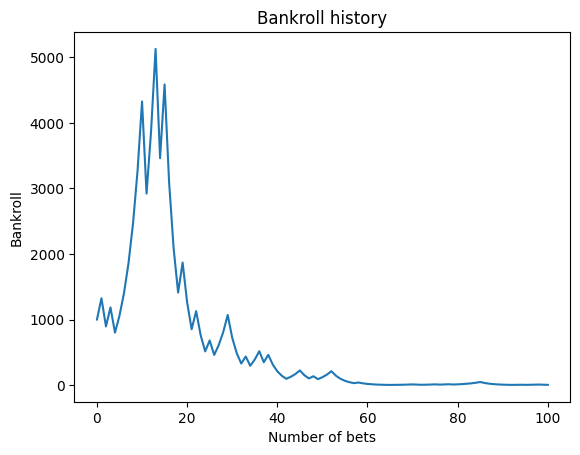

In [ ]:
bankroll = 10000  # Initial bankroll
n = 100 # Number of iterations

# simulate betting
bankroll_history = [bankroll]
for i in range(n):
    # simulate a round
    outcome = np.random.rand()
    # Calculate the fraction to bet
    f = kelly_criterion(b, p)
    # Bet a fraction of the bankroll
    bet = f * bankroll
    # Win the bet
    bankroll -= bet
    bankroll += b * bet if outcome < p else 0
    bankroll_history.append(bankroll)

# Plot the bankroll history
plt.plot(bankroll_history)
plt.xlabel('Number of bets')
plt.ylabel('Bankroll')
plt.title('Bankroll history')
plt.show()

## Question 3
## Betting on a Weighted 6-Sided Die Roll
    
In this section we will determine the optimal bet size to maximize long-term growth when betting on the outcome of a weighted 6-sided die roll. The probabilities for each face of the die are as follows:
    
    1: 10%
    2: 20%
    3: 30%
    4: 20%
    5: 10%
    6: 10%
    
For a bet of $100, if you roll a 1 2 or 3 you win $200. If you roll a 4 5 or 6 you lose $50. How much of your $5000 bankroll should you bet to maximize your expected long-term wealth?

### Problem Statement

You are betting on the outcome of a weighted 6-sided die roll:
- You win $200 if you roll a 1 2 or 3.
- You lose $50 if you roll a 4 5 or 6.

How much should you bet from your $5000 bankroll to maximize your expected long-term growth?


In our case:
- \( b = \frac{200}{100} = 2 \) (since you win $200 for a $100 bet).
- \( p = 0.1 + 0.2 + 0.3 = 0.6 \) (since the probability of rolling a 1, 2, or 3 is 0.6).
- \( q = 1 - p = 0.4 \).


Let's calculate the optimal bet size using the Kelly Criterion.